In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath = "../../Data/Genesis_Destatis/Hazardous Waste/cleaned_32151-0001_Hazardous-Waste-producers-quantities-years-industry-types of waste(EAV 2).csv"
df = pd.read_csv(filepath)
df.head()

,Year,Industry Code,Industry,EAV code,Waste Description,Number Of Waste Generators,Volumes Of Waste (1000t),Volumes Of Waste Generated By Primary Producers (1000t)
0,2008,WZ08-A,"Agriculture And Forestry, Fisheries",EAV-01,Waste from the extraction of mineral resources,NaN,NaN,NaN
1,2008,WZ08-A,"Agriculture And Forestry, Fisheries",EAV-02,"Waste from agriculture, forestry, etc.",NaN,NaN,NaN
2,2008,WZ08-A,"Agriculture And Forestry, Fisheries",EAV-03,"Waste from wood processing, etc.",NaN,NaN,NaN
3,2008,WZ08-A,"Agriculture And Forestry, Fisheries",EAV-04,"Waste from the leather, fur and textile indust...",NaN,NaN,NaN
4,2008,WZ08-A,"Agriculture And Forestry, Fisheries",EAV-05,"Waste from petroleum refining, natural gas pur...",NaN,NaN,NaN


In [7]:
eav_df = df.groupby('EAV code', as_index=False).agg({'Waste Description': 'min'})
eav_dict = dict(zip(eav_df['EAV code'], eav_df['Waste Description']))
eav_dict[np.nan] = 'Total'
df['Waste Description'] = df['EAV code'].apply(lambda x: eav_dict[x])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10290 entries, 0 to 10289
Data columns (total 8 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Year                                                     10290 non-null  int64  
 1   Industry Code                                            9996 non-null   object 
 2   Industry                                                 10290 non-null  object 
 3   EAV code                                                 9800 non-null   object 
 4   Waste Description                                        10290 non-null  object 
 5   Number Of Waste Generators                               6370 non-null   float64
 6   Volumes Of Waste (1000t)                                 6370 non-null   float64
 7   Volumes Of Waste Generated By Primary Producers (1000t)  6369 non-null   float64
dtypes: float64(3), int64(1), ob

## For a year, find the industry and type of waste whose data is completely missing

In [9]:
def get_missing_data_year(df, year):
    pred = (df['Year'] == year) & (df['Number Of Waste Generators'].isna()) & (df['Volumes Of Waste (1000t)'].isna()) & (df['Volumes Of Waste Generated By Primary Producers (1000t)'].isna())
    df1 = df.loc[pred]
    return list(zip(df1['Industry'], df1['Waste Description']))

get_missing_data_year(df, 2008)

[('Agriculture And Forestry, Fisheries',
  'Waste from the extraction of mineral resources'),
 ('Agriculture And Forestry, Fisheries',
  'Waste from agriculture, forestry, etc.'),
 ('Agriculture And Forestry, Fisheries', 'Waste from wood processing, etc.'),
 ('Agriculture And Forestry, Fisheries',
  'Waste from the leather, fur and textile industries'),
 ('Agriculture And Forestry, Fisheries',
  'Waste from petroleum refining, natural gas purification'),
 ('Agriculture And Forestry, Fisheries',
  'Waste from inorganic chemical processes'),
 ('Agriculture And Forestry, Fisheries',
  'Waste from HZVA, including coatings, adhesives, etc.'),
 ('Agriculture And Forestry, Fisheries',
  'Waste from the photographic industry'),
 ('Agriculture And Forestry, Fisheries', 'Waste from thermal processes'),
 ('Agriculture And Forestry, Fisheries',
  'Waste from chemical surface treatment'),
 ('Agriculture And Forestry, Fisheries',
  'Waste from mechanical shaping processes'),
 ('Agriculture And Fores

## Write a function to return non-missing data for given industry in given year

In [10]:
def get_data_industry_year(df, industry, year):
    """Return non-NAN data for this industry given this year"""
    pred = (df['Year'] == year) & (df['Industry'] == industry) & ~((df['Number Of Waste Generators'].isna()) & (df['Volumes Of Waste (1000t)'].isna()) & \
                                    (df['Volumes Of Waste Generated By Primary Producers (1000t)'].isna()))
    return df.loc[pred]

get_data_industry_year(df, 'Agriculture And Forestry, Fisheries', 2021)

,Year,Industry Code,Industry,EAV code,Waste Description,Number Of Waste Generators,Volumes Of Waste (1000t),Volumes Of Waste Generated By Primary Producers (1000t)
9564,2021,WZ08-A,"Agriculture And Forestry, Fisheries",EAV-10,Waste from thermal processes,3.0,0.0,0.0
9570,2021,WZ08-A,"Agriculture And Forestry, Fisheries",EAV-16,Waste not included elsewhere in the inventory,5.0,0.3,0.3
9571,2021,WZ08-A,"Agriculture And Forestry, Fisheries",EAV-17,Construction and demolition waste,96.0,7.1,7.1
9575,2021,WZ08-A,"Agriculture And Forestry, Fisheries",NaN,Total,108.0,8.1,8.1


In [12]:
get_data_industry_year(df, 'Manufacture Of Chemical Products', 2020).head(5)

,Year,Industry Code,Industry,EAV code,Waste Description,Number Of Waste Generators,Volumes Of Waste (1000t),Volumes Of Waste Generated By Primary Producers (1000t)
8989,2020,WZ08-20,Manufacture Of Chemical Products,EAV-02,"Waste from agriculture, forestry, etc.",5.0,0.2,0.2
8992,2020,WZ08-20,Manufacture Of Chemical Products,EAV-05,"Waste from petroleum refining, natural gas pur...",15.0,2.2,2.2
8993,2020,WZ08-20,Manufacture Of Chemical Products,EAV-06,Waste from inorganic chemical processes,164.0,169.0,139.5
8994,2020,WZ08-20,Manufacture Of Chemical Products,EAV-07,Waste from organic chemical processes,513.0,708.4,699.7
8995,2020,WZ08-20,Manufacture Of Chemical Products,EAV-08,"Waste from HZVA, including coatings, adhesives...",207.0,42.3,41.5


Year, Industry, Waste Description, Volume of Waste

## For a given year, get average volume of waste for an industry 

In [15]:
def avg_volume_waste_industry_year(df, year):
    df1 = df.loc[df['Year'] == year]
    agg_ins = {'Volumes Of Waste (1000t)': 'mean', 'Volumes Of Waste Generated By Primary Producers (1000t)': 'mean'}
    df2 = df1.groupby(['Industry'], as_index=False).agg(agg_ins).sort_values('Volumes Of Waste (1000t)', ascending=False)
    df2.index = range(len(df2))
    return df2

avg_volume_waste_industry_year(df, 2021).head(10)

,Industry,Volumes Of Waste (1000t),Volumes Of Waste Generated By Primary Producers (1000t)
0,In Total,2234.757143,1665.419048
1,"Water Supply, Disposal, Elimination Of Environ...",992.231579,532.442105
2,"Collection, Waste Disposal, Recovery",899.736842,459.673684
3,Other Economic Sectors,555.400000,555.400000
4,Manufacturing Industry,461.966667,412.490476
5,"Public Administration, Defense, Social Security",272.366667,268.833333
6,Construction Industry,221.400000,212.533333
7,Power Supply,200.328571,153.500000
8,Metal Production And Processing,181.566667,167.740000
9,"Grundst./Apartments, Freiber.,Scientific,Techn...",175.452941,165.588235


In [16]:
avg_volume_waste_industry_year(df, 2008).head(5)

,Industry,Volumes Of Waste (1000t),Volumes Of Waste Generated By Primary Producers (1000t)
0,In Total,2147.566667,1654.219048
1,"Water Supply, Disposal, Elimination Of Environ...",882.610526,483.300000
2,"Collection, Waste Disposal, Recovery",752.045000,386.055000
3,Manufacturing Industry,499.621053,446.942105
4,Other Economic Sectors,416.100000,415.800000


## Find total amount generated by a type of waste in given year

In [39]:
year_waste_mean_df = df.groupby(['Year', 'Waste Description'], as_index=False).agg({'Volumes Of Waste (1000t)': 'mean', 'Volumes Of Waste Generated By Primary Producers (1000t)': 'mean'})
year_waste_total_df = df.groupby(['Year', 'Waste Description'], as_index=False).agg({'Volumes Of Waste (1000t)': 'sum', 'Volumes Of Waste Generated By Primary Producers (1000t)': 'sum'})
year_waste_mean_df.rename(columns={'Volumes Of Waste (1000t)': 'All', 'Volumes Of Waste Generated By Primary Producers (1000t)':'By Primary Producers'}, inplace=True)

array([<Axes: title={'center': 'Average Recored Volumes Of Waste From Medical Care Through Years'}, xlabel='Year', ylabel='Amount (1000t)'>,
       <Axes: title={'center': 'Average Recored Volumes Of Waste From Medical Care By Primary Producers Through Years'}, xlabel='Year', ylabel='Amount (1000t)'>],
      dtype=object)

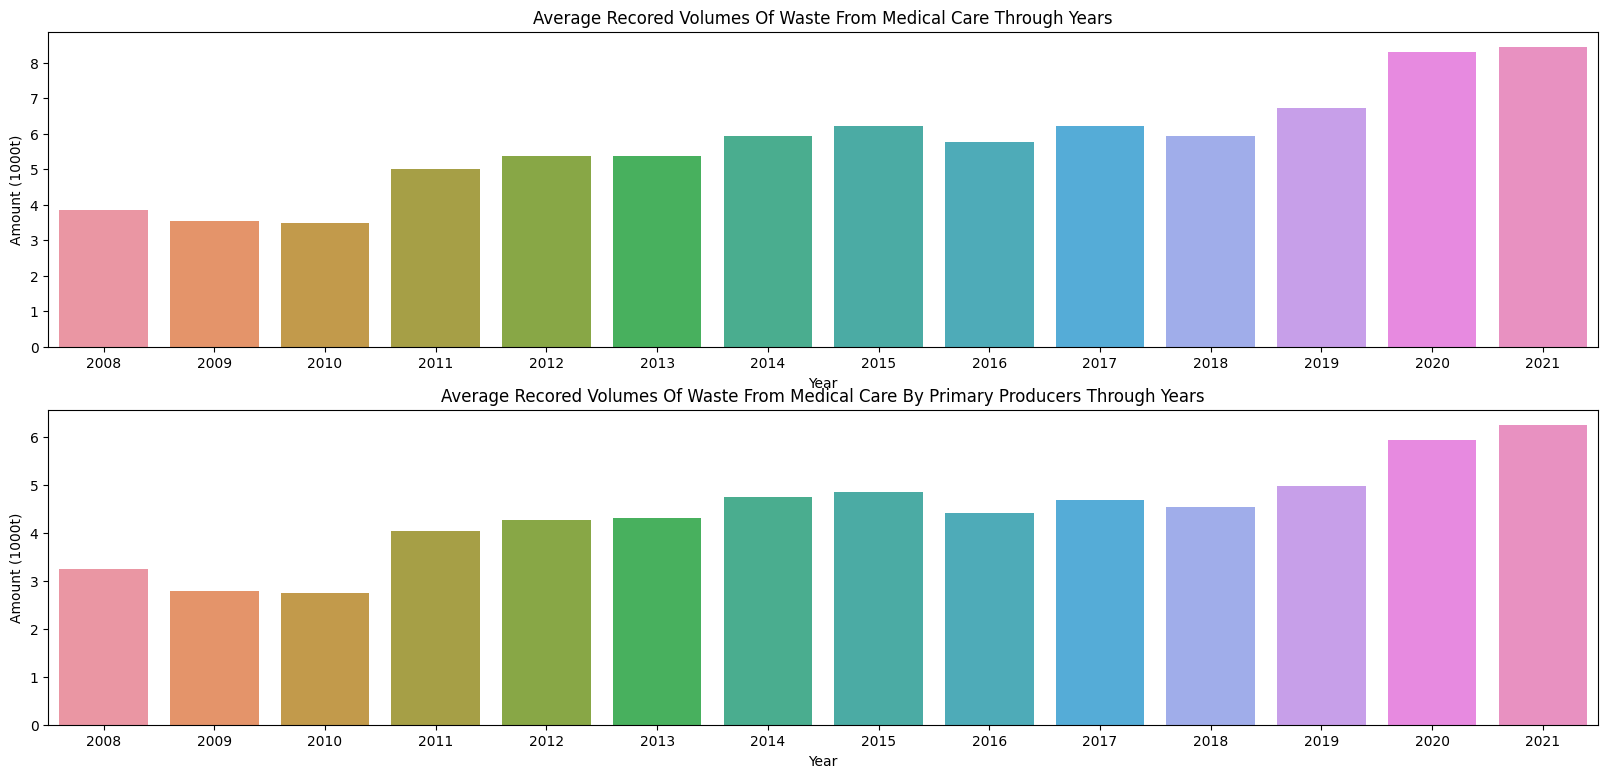

In [41]:
def plot_mean_waste_years_1(mean_df, waste):
    df1 = mean_df.loc[mean_df['Waste Description'] == waste]
    fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(20, 9))
    sns.barplot(data=df1, x='Year', y='All', ax=ax[0])
    ax[0].title.set_text(f"Average Recored Volumes Of {waste.title()} Through Years")
    ax[0].set_ylabel('Amount (1000t)')
    sns.barplot(data=df1, x='Year', y='By Primary Producers', ax=ax[1])
    ax[1].title.set_text(f"Average Recored Volumes Of {waste.title()} By Primary Producers Through Years")
    ax[1].set_ylabel('Amount (1000t)')
    return ax
    
plot_mean_waste_years_1(year_waste_mean_df, 'Waste from medical care')

In [34]:
eav_dict

{'EAV-01': 'Waste from the extraction of mineral resources',
 'EAV-02': 'Waste from agriculture, forestry, etc.',
 'EAV-03': 'Waste from wood processing, etc.',
 'EAV-04': 'Waste from the leather, fur and textile industries',
 'EAV-05': 'Waste from petroleum refining, natural gas purification',
 'EAV-06': 'Waste from inorganic chemical processes',
 'EAV-07': 'Waste from organic chemical processes',
 'EAV-08': 'Waste from HZVA, including coatings, adhesives, etc.',
 'EAV-09': 'Waste from the photographic industry',
 'EAV-10': 'Waste from thermal processes',
 'EAV-11': 'Waste from chemical surface treatment',
 'EAV-12': 'Waste from mechanical shaping processes',
 'EAV-13': 'Oil waste and liquid fuel waste',
 'EAV-14': 'Waste from organic solvents, coolants',
 'EAV-15': 'Packaging waste, absorbent masses, wipes',
 'EAV-16': 'Waste not included elsewhere in the inventory',
 'EAV-17': 'Construction and demolition waste',
 'EAV-18': 'Waste from medical care',
 'EAV-19': 'Waste from waste tre

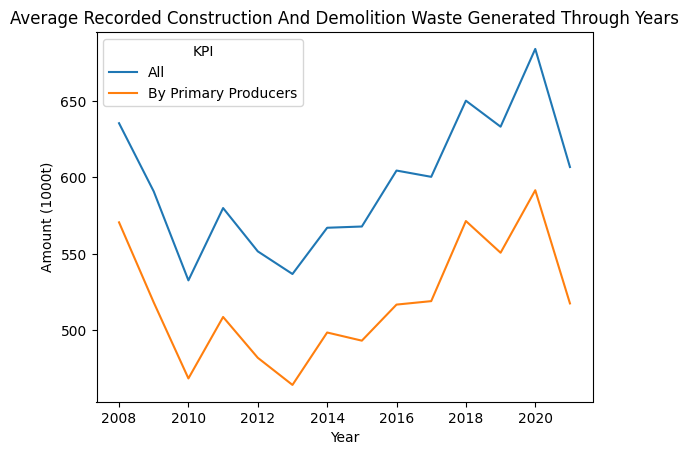

In [33]:
def plot_mean_waste_years_2(mean_df, waste):
    df1 = mean_df.loc[mean_df['Waste Description'] == waste]
    
    df2 = df1.melt(id_vars=['Year'], value_vars=['All', 'By Primary Producers'], var_name='KPI', value_name='Amount (1000t)')
    sns.lineplot(data=df2, x='Year', y='Amount (1000t)', hue='KPI')
    plt.title(f"Average Recorded {waste.title()} Generated Through Years")

plot_mean_waste_years_2(year_waste_mean_df, 'Construction and demolition waste')

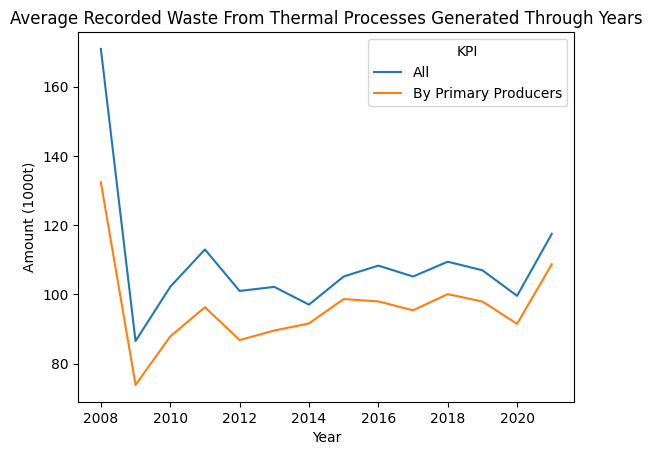

In [35]:
plot_mean_waste_years_2(year_waste_mean_df, waste='Waste from thermal processes')